In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
file_path = "/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/CCK8-Transfection_Plots/20240202_CCK8-Transfection_DIPLibrary_PBS.xlsx" 
sheet_name = 'NP5'  
df = pd.read_excel(file_path, sheet_name=sheet_name)


In [14]:
# creating variables in our df to use to plot
variable = df['Variables'][::-1]
viability = df['Viability'][::-1]
std_devs = df['Standard Deviation'][::-1]

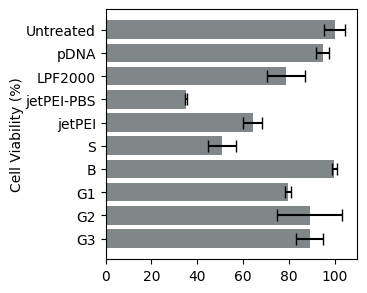

In [15]:
# plotting the CCK8 assay information
color_gray = "#818689"

plt.figure(figsize=(3.25, 3.25))
plt.barh(variable, viability, xerr=std_devs, capsize = 4, color=color_gray)
plt.ylabel('Cell Viability (%)', labelpad=1)

plt.show()

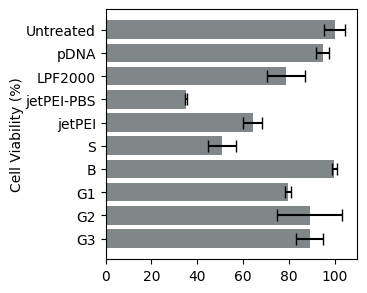

In [16]:
color_gray = "#818689"

plt.figure(figsize=(3.25, 3.25))
plt.barh(variable, viability, xerr=std_devs, capsize=4, color=color_gray)
plt.ylabel('Cell Viability (%)', labelpad=1)

plt.show()

## Verticle Plotting of Cell Viability

Need to change what sheet you're using on the 'sheet_name' variable to combine data from different N/P ratios

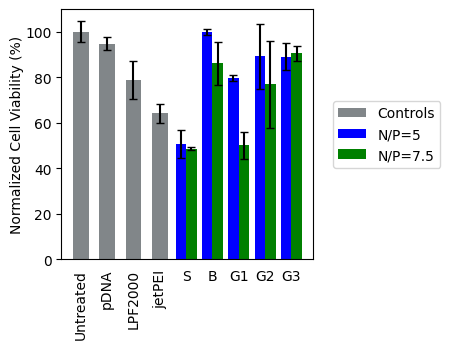

In [6]:
second_set_start = df[df['Variables'] == 'S'].index[1]

df_controls = df.iloc[:4]  
df_first_set = df.iloc[4:second_set_start]  
df_second_set = df.iloc[second_set_start:]  


fig, ax = plt.subplots(figsize=(3.25, 3.25))

bar_width = 0.4

control_indices = np.arange(len(df_controls))

base_x_positions = np.arange(len(df_controls), len(df_controls) + len(df_first_set))

first_set_indices = base_x_positions - bar_width / 2
second_set_indices = base_x_positions + bar_width / 2

ax.bar(control_indices, df_controls['Viability'], yerr=df_controls['Standard Deviation'], capsize=3, color=color_gray, width=0.6, label='Controls')
ax.bar(first_set_indices, df_first_set['Viability'], yerr=df_first_set['Standard Deviation'], capsize=3, color='blue', width=bar_width, label='N/P=5')
ax.bar(second_set_indices, df_second_set['Viability'], yerr=df_second_set['Standard Deviation'], capsize=3, color='green', width=bar_width, label='N/P=7.5')

ax.set_xticks(np.arange(len(df_controls) + len(df_first_set)))
ax.set_xticklabels(df_controls['Variables'].tolist() + df_first_set['Variables'].tolist())


for i, label in enumerate(ax.get_xticklabels()):
    if i < len(df_controls):  
        label.set_rotation(90)

ax.set_ylabel('Normalized Cell Viability (%)', labelpad=1)

ax.tick_params(bottom=False)
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=10)

plt.show()

## Horizontal Plotting of Cell Viability

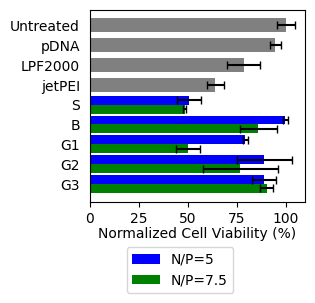

In [7]:
second_set_start = df[df['Variables'] == 'S'].index[1]

df_controls = df.iloc[:4] 
df_first_set = df.iloc[4:second_set_start]  
df_second_set = df.iloc[second_set_start:]  

fig, ax = plt.subplots(figsize=(3.25, 3.25))  
bar_width = 0.45

control_indices = np.arange(len(df_controls))
base_y_positions = np.arange(len(df_controls), len(df_controls) + len(df_first_set))

first_set_indices = base_y_positions - bar_width / 2
second_set_indices = base_y_positions + bar_width / 2

ax.barh(control_indices, df_controls['Viability'], xerr=df_controls['Standard Deviation'], capsize=3, color='gray', height=0.7, label='')
ax.barh(first_set_indices, df_first_set['Viability'], xerr=df_first_set['Standard Deviation'], capsize=3, color='blue', height=bar_width, label='N/P=5')
ax.barh(second_set_indices, df_second_set['Viability'], xerr=df_second_set['Standard Deviation'], capsize=3, color='green', height=bar_width, label='N/P=7.5')

ax.invert_yaxis()

ax.set_yticks(np.arange(len(df_controls) + len(df_first_set)))
ax.set_yticklabels(df_controls['Variables'].tolist() + df_first_set['Variables'].tolist())
ax.set_xlabel('Normalized Cell Viability (%)', labelpad=1)
ax.legend(bbox_to_anchor=(0.7, -0.2), fontsize=10)
ax.tick_params(left=False)

plt.tight_layout()  
plt.show()

In [17]:
transfection = df['Transfection'][::-1]
stddev = df['StdDev'][::-1]

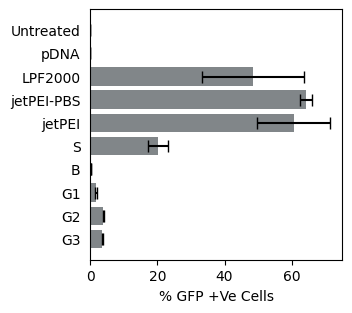

In [18]:
plt.figure(figsize=(3.25, 3.25))
plt.barh(variable, transfection, xerr=stddev, capsize = 4, color=color_gray)
plt.xlim(left=0)
plt.tick_params(left=False)
plt.xlabel('% GFP +Ve Cells')

plt.show()

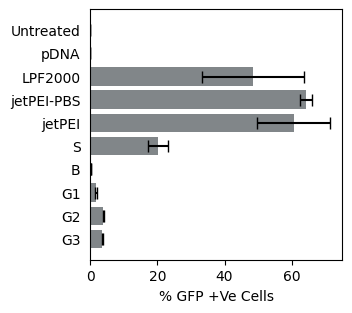

In [19]:
# plotting the CCK8 assay information
color_gray = "#818689"
plt.figure(figsize=(3.25, 3.25))

plt.barh(variable, transfection, xerr=stddev, capsize = 4, color=color_gray)
plt.xlim(left=0)
plt.tick_params(left=False)
plt.xlabel('% GFP +Ve Cells')

plt.show()

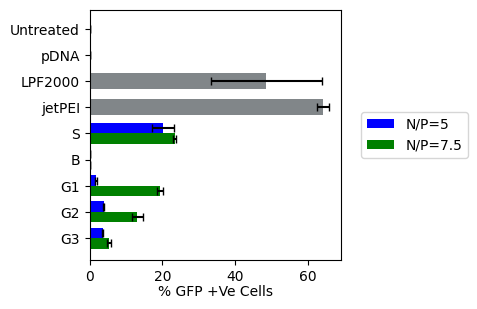

In [12]:
second_set_start = df[df['Variables'] == 'S'].index[1]

df_controls = df.iloc[:4]  
df_first_set = df.iloc[4:second_set_start] 
df_second_set = df.iloc[second_set_start:]  

fig, ax = plt.subplots(figsize=(3.25, 3.25))
bar_width = 0.4

control_indices = np.arange(len(df_controls))
base_x_positions = np.arange(len(df_controls), len(df_controls) + len(df_first_set))

first_set_indices = base_x_positions - bar_width / 2
second_set_indices = base_x_positions + bar_width / 2

ax.barh(control_indices, df_controls['Transfection'], xerr=df_controls['StdDev'], capsize=3, color=color_gray, height=0.6, label='')
ax.barh(first_set_indices, df_first_set['Transfection'], xerr=df_first_set['StdDev'], capsize=3, color='blue', height=bar_width, label='N/P=5')
ax.barh(second_set_indices, df_second_set['Transfection'], xerr=df_second_set['StdDev'], capsize=3, color='green', height=bar_width, label='N/P=7.5')

ax.set_yticks(np.arange(len(df_controls) + len(df_first_set)))
ax.set_yticklabels(df_controls['Variables'].tolist() + df_first_set['Variables'].tolist())

ax.invert_yaxis()

ax.set_xlabel('% GFP +Ve Cells', labelpad=1)
ax.set_xlim(left=0)

ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=10)

plt.show()